In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chooseTheModel import chooseTheModel
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
trip_dataset = pd.read_csv('Datasets/trip_dataset.csv')

In [3]:
x_1 = trip_dataset[['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance']].fillna(0)
x_2 = trip_dataset[['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance','rain','temp','snow','windspeed']].fillna(0)



In [4]:
week_days = ['SUN','MON','TUE','WED','THU','FRY','SAT']
x_3 = ['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance','rain','temp','snow','windspeed'] + week_days
x_3 = trip_dataset[x_3].fillna(0)

In [5]:
x_4 = ['pickup_longitude','pickup_latitude','dropoff_longitude',
                 'dropoff_latitude','pickup_datetime_int','distance'] + week_days
x_4 = trip_dataset[x_4].fillna(0)

In [6]:
x = []
x.append(("GRUPO01",x_1))
x.append(("GRUPO02",x_2))
x.append(("GRUPO03",x_3))
x.append(("GRUPO04",x_4))

In [7]:
trip_dataset['trip_duration'] = np.log(trip_dataset['trip_duration'])
y = trip_dataset['trip_duration']

In [8]:
# prepare models
models = []
models.append((AdaBoostRegressor()))
models.append((BaggingRegressor()))
models.append((GradientBoostingRegressor()))
models.append((RandomForestRegressor()))

In [9]:
chooser = chooseTheModel.Chooser(models,x,y)

In [10]:
df = chooser.choose()

KeyboardInterrupt: 

In [11]:
df.head(10)

,Grupo,Início,R2 Score,RMSE,Standard Deviation,Término
GradientBoostingRegressor,GRUPO03,2017-11-29 17:05:53.232765,0.983488,0.206522,0.006800,2017-11-29 17:06:12.512619
GradientBoostingRegressor,GRUPO02,2017-11-29 17:05:20.844480,0.983481,0.206572,0.006784,2017-11-29 17:05:36.869999
GradientBoostingRegressor,GRUPO04,2017-11-29 17:06:31.885543,0.983339,0.207444,0.006926,2017-11-29 17:06:48.823719
GradientBoostingRegressor,GRUPO01,2017-11-29 17:04:53.936147,0.983324,0.207550,0.006897,2017-11-29 17:05:07.372805
RandomForestRegressor,GRUPO02,2017-11-29 17:07:36.951329,0.980717,0.221309,0.008530,2017-11-29 17:07:55.715801
BaggingRegressor,GRUPO02,2017-11-29 17:02:59.386801,0.980355,0.221988,0.007992,2017-11-29 17:03:17.478804
BaggingRegressor,GRUPO04,2017-11-29 17:04:16.555284,0.980650,0.222740,0.008980,2017-11-29 17:04:35.369799
RandomForestRegressor,GRUPO04,2017-11-29 17:08:53.829972,0.980555,0.223250,0.009067,2017-11-29 17:09:12.314890
BaggingRegressor,GRUPO01,2017-11-29 17:02:27.614961,0.980574,0.223428,0.006624,2017-11-29 17:02:43.488371
BaggingRegressor,GRUPO03,2017-11-29 17:03:35.649865,0.980746,0.223814,0.010027,2017-11-29 17:03:56.214647


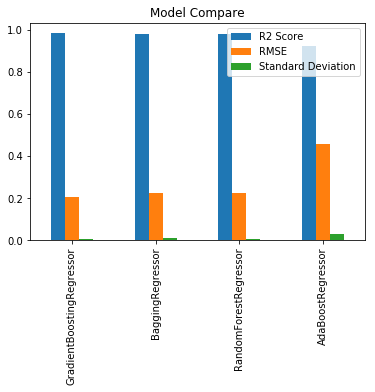

In [12]:
chooser.chart(['GRUPO03'])

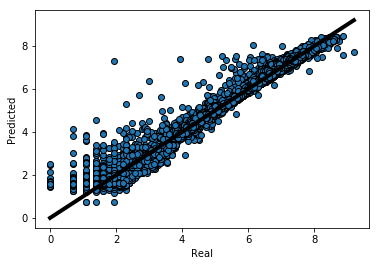

In [13]:
chooser.test('GRUPO03',GradientBoostingRegressor())

In [20]:
model = GradientBoostingRegressor()
print('O valor previsto para a linha 10 é : ' + str(chooser.predict(model,x_3)[10]))
print('O valor real para a linha 10 é : ' + str(y[y.index == 10]))
print('O valor previsto para a linha 32 é : ' + str(chooser.predict(model,x_3)[32]))
print('O valor real para a linha 32 é : ' + str(y[y.index == 32]))
print('O valor previsto para a linha 2 é : ' + str(chooser.predict(model,x_3)[2]))
print('O valor real para a linha 2 é : ' + str(y[y.index == 2]))

O valor previsto para a linha 10 é : 6.59903827349
O valor real para a linha 10 é : 10    6.597146
Name: trip_duration, dtype: float64
O valor previsto para a linha 32 é : 7.35044349958
O valor real para a linha 32 é : 32    7.266129
Name: trip_duration, dtype: float64
O valor previsto para a linha 2 é : 7.12335713172
O valor real para a linha 2 é : 2    7.128496
Name: trip_duration, dtype: float64


In [26]:
df[['R2 Score','RMSE','Standard Deviation']].head(1)

,R2 Score,RMSE,Standard Deviation
GradientBoostingRegressor,0.983488,0.206522,0.0068
